 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-02-store-output)
 
 
## 상가(상권)정보 분석하기
* 데이터 출처 : [공공데이터포털](https://www.data.go.kr/dataset/15012005/fileData.do)
* 소상공인 상권정보 상가업소 데이터
* 영상에 사용한 데이터셋 다운로드 : http://bit.ly/open-data-set-folder

### 데이터셋을 엑셀에서 열어보는 방법

```
MS엑셀(Excel)에서 UTF-8로 된 CSV파일 불러오기 
 ◦  기존 euc-kr 데이터 추출형식으로 인해 업소명 오류가 발견되었으며 이를 개선하고자 UTF-8 형식으로 추출하였습니다.
 ◦ 개발자가 아닌 일반사용자의 경우 euc-kr(UTF-8 이나 UTF-16)이 아닌 CSV파일을 엑셀에서 바로 열면 한글이 모두 깨지게 됩니다.
 
 ◦ 바로 열지 마시고 다음 절차를 거치시기 바랍니다. 
   - 엑셀을 실행하고 데이터 → 텍스트를 선택합니다.
   - 가져올 파일을 선택하고 확인을 클릭합니다.
   - 콤보 박스에서 적절한 코드 타입이 선택됐는지 확인합니다. 
     * UTF-8의 코드 페이지 넘버는 65001입니다.
 
   - 원본 데이터 파일 유형을 ‘구분 기호로 분리됨’ 선택합니다. 
   - 기타 ‘|’(파이프) 입력, 3단계 텍스트로 선택합니다.  
     * 단, 지번코드, 건물관리번호, 신우편번호, 경도, 위도 등 행마다 텍스트 선택   
  
``` 

### 데이터셋 분류 지역
* 이 튜토리얼에서는 1번 파일만 사용합니다.

```
※ 파일데이터 분류 지역 
1 : 서울, 부산
2 : 대구, 인천, 광주, 대전, 울산
3 : 경기, 강원, 충북
4 : 충남, 전북, 전남, 경북, 경남, 제주
```

## 라이브러리 로드

In [2]:
# 라이브러리를 로드합니다.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 한글폰트 설정

In [8]:
# 한글폰트를 설정합니다.
# Win
plt.rc("font", family="Malgun Gothic")
# Mac
# plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)

In [4]:
# 레티나 디스플레이로 폰트가 선명하게 표시되도록 합니다.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

### 한글폰트 설정 확인

<AxesSubplot:title={'center':'한글폰트 설정'}>

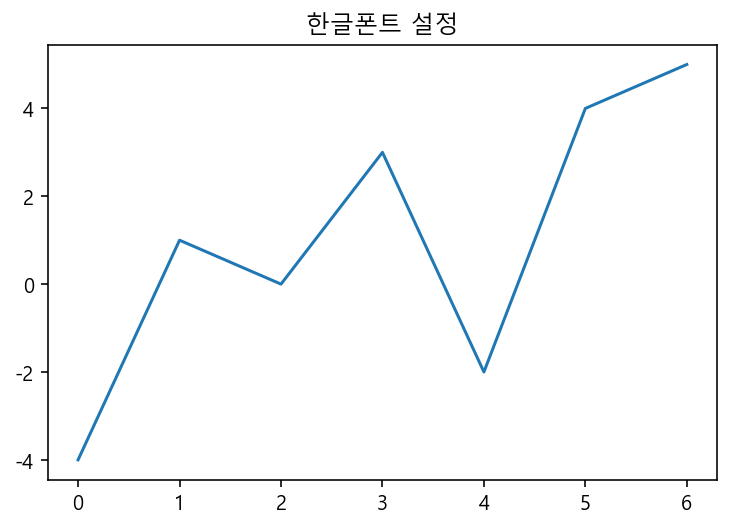

In [9]:
pd.Series([-4, 1, 0, 3, -2, 4, 5])
pd.Series([-4, 1, 0, 3, -2, 4, 5]).plot(title="한글폰트 설정")

## 파일로드

In [123]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3035-BAA4

 C:\Users\gg787\open-data-analysis-basic-master 디렉터리



파일을 찾을 수 없습니다.


In [124]:
# 파일을 로드합니다.

# df = pd.read_csv("data/상가업소정보_201912_01.csv", sep='|') #선생님이 한거
# df.shape

df = pd.read_csv("상가업소정보_201912_01.csv", sep = "|")
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1168010100206960042,1,대지,696,42.0,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,NaN,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11545,금천구,1154563000,독산3동,1154510200,독산동,1154510200201620001,1,대지,162,1.0,서울특별시 금천구 독산동 162-1,115453117003,서울특별시 금천구 가산로,34,6.0,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,"피자, 햄버거, 샌드위치 및 유사 음식점업",26,부산광역시,26530,사상구,2653062000,괘법동,2653010400,괘법동,2653010400205780000,1,대지,578,NaN,부산광역시 사상구 괘법동 578,265303139004,부산광역시 사상구 괘감로,37,NaN,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,욕탕업,11,서울특별시,11710,송파구,1171060000,석촌동,1171010500,석촌동,1171010500202560000,1,대지,256,NaN,서울특별시 송파구 석촌동 256,117103123001,서울특별시 송파구 가락로,71,NaN,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573675,16394290,비파티세리공덕,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11440,마포구,1144056500,공덕동,1144010200,공덕동,1144010200201050067,1,대지,105,67.0,서울특별시 마포구 공덕동 105-67,114404139142,서울특별시 마포구 마포대로14길,4,NaN,1144010200101050067001710,NaN,서울특별시 마포구 마포대로14길 4,121801,4211.0,NaN,NaN,NaN,126.955059,37.548618
573676,16336474,앤탑PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,컴퓨터 게임방 운영업,11,서울특별시,11200,성동구,1120069000,성수2가3동,1120011500,성수동2가,1120011500202890015,1,대지,289,15.0,서울특별시 성동구 성수동2가 289-15,112004109367,서울특별시 성동구 성수일로8길,37,NaN,1120011500102890015004255,으뜸프린팅(주),서울특별시 성동구 성수일로8길 37,133834,4794.0,NaN,2,NaN,127.054615,37.545853
573677,16336218,오즈아레나PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,컴퓨터 게임방 운영업,11,서울특별시,11680,강남구,1168052100,논현1동,1168010800,논현동,1168010800201650008,1,대지,165,8.0,서울특별시 강남구 논현동 165-8,116802102001,서울특별시 강남구 강남대로,492,NaN,1168010800101650008000001,한맥빌딩,서울특별시 강남구 강남대로 492,135825,6119.0,NaN,2,NaN,127.024102,37.506202
573678,16335152,파인트리네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,기타미용업,11,서울특별시,11560,영등포구,1156054000,여의동,1156011000,여의도동,1156011000200230000,1,대지,23,NaN,서울특별시 영등포구 여의도동 23,115603118002,서울특별시 영등포구 국제금융로,10,NaN,1156011000100230000000001,서울국제금융센터,서울특별시 영등포구 국제금융로 10,150945,7326.0,NaN,1,NaN,126.924863,37.525172


In [125]:
# 모든 컬럼이 표시되도록 max_columns 의 수를 지정합니다.

pd.options.display.max_columns = 39

## 미리보기

### head, tail

In [126]:
# head 로 미리보기를 합니다.

df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1168010100206960042,1,대지,696,42.0,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,NaN,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11545,금천구,1154563000,독산3동,1154510200,독산동,1154510200201620001,1,대지,162,1.0,서울특별시 금천구 독산동 162-1,115453117003,서울특별시 금천구 가산로,34,6.0,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,"피자, 햄버거, 샌드위치 및 유사 음식점업",26,부산광역시,26530,사상구,2653062000,괘법동,2653010400,괘법동,2653010400205780000,1,대지,578,NaN,부산광역시 사상구 괘법동 578,265303139004,부산광역시 사상구 괘감로,37,NaN,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,욕탕업,11,서울특별시,11710,송파구,1171060000,석촌동,1171010500,석촌동,1171010500202560000,1,대지,256,NaN,서울특별시 송파구 석촌동 256,117103123001,서울특별시 송파구 가락로,71,NaN,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [127]:
# tail 로 미리보기를 합니다.
df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
573675,16394290,비파티세리공덕,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11440,마포구,1144056500,공덕동,1144010200,공덕동,1144010200201050067,1,대지,105,67.0,서울특별시 마포구 공덕동 105-67,114404139142,서울특별시 마포구 마포대로14길,4,NaN,1144010200101050067001710,NaN,서울특별시 마포구 마포대로14길 4,121801,4211.0,NaN,NaN,NaN,126.955059,37.548618
573676,16336474,앤탑PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,컴퓨터 게임방 운영업,11,서울특별시,11200,성동구,1120069000,성수2가3동,1120011500,성수동2가,1120011500202890015,1,대지,289,15.0,서울특별시 성동구 성수동2가 289-15,112004109367,서울특별시 성동구 성수일로8길,37,NaN,1120011500102890015004255,으뜸프린팅(주),서울특별시 성동구 성수일로8길 37,133834,4794.0,NaN,2,NaN,127.054615,37.545853
573677,16336218,오즈아레나PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,컴퓨터 게임방 운영업,11,서울특별시,11680,강남구,1168052100,논현1동,1168010800,논현동,1168010800201650008,1,대지,165,8.0,서울특별시 강남구 논현동 165-8,116802102001,서울특별시 강남구 강남대로,492,NaN,1168010800101650008000001,한맥빌딩,서울특별시 강남구 강남대로 492,135825,6119.0,NaN,2,NaN,127.024102,37.506202
573678,16335152,파인트리네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,기타미용업,11,서울특별시,11560,영등포구,1156054000,여의동,1156011000,여의도동,1156011000200230000,1,대지,23,NaN,서울특별시 영등포구 여의도동 23,115603118002,서울특별시 영등포구 국제금융로,10,NaN,1156011000100230000000001,서울국제금융센터,서울특별시 영등포구 국제금융로 10,150945,7326.0,NaN,1,NaN,126.924863,37.525172
573679,16335150,마이리틀네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,기타미용업,11,서울특별시,11320,도봉구,1132051100,창1동,1132010700,창동,1132010700208120000,1,대지,812,NaN,서울특별시 도봉구 창동 812,113204127109,서울특별시 도봉구 도봉로114길,22,8.0,1132010700108120000018489,현대타운아파트,서울특별시 도봉구 도봉로114길 22-8,132691,1455.0,101,NaN,NaN,127.035145,37.647099


### 인덱스 정보 보기

In [128]:
df.index

RangeIndex(start=0, stop=573680, step=1)

### 컬럼명만 보기

In [129]:
# 컬럼값만 보기
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### info

In [130]:
# info 로 데이터프레임의 정보보기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

### 데이터 타입 보기

In [131]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 결측치 확인하기

In [132]:
True == 1

True

In [133]:
# 결측치를 구해서 n 이라는 변수에 담고 재사용 합니다.

n = df.isnull().sum()
n

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

### 결측치 시각화

<AxesSubplot:>

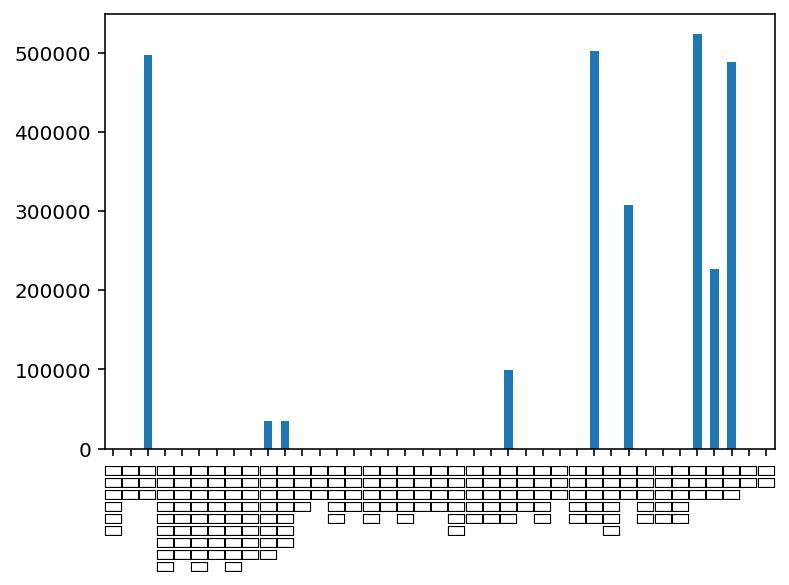

In [134]:
# 막대그래프로 시각화 합니다.
n.plot.bar()

<class 'pandas.core.series.Series'>


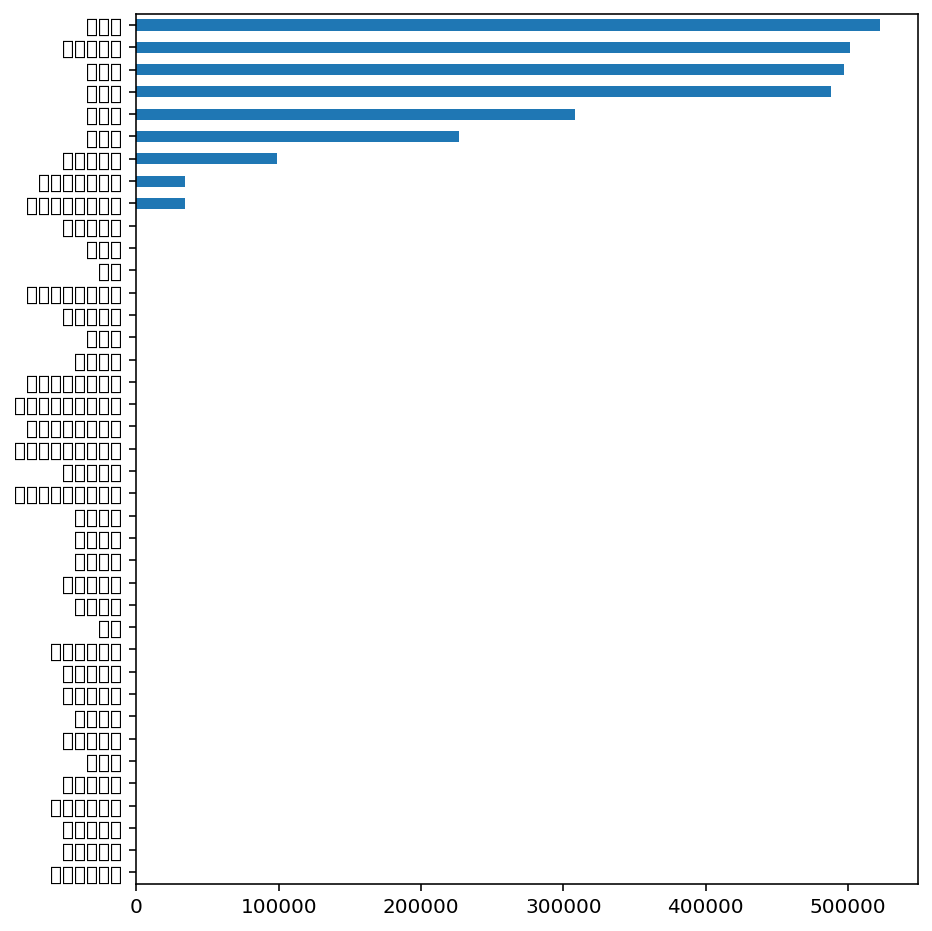

In [150]:
# 값을 정렬해서 결측치가 많은 값이 위에 그려지도록 barh로 그립니다.
n.sort_values().plot.barh(figsize=(7, 8))

### missingno 로 결측치 시각화 하기
* 별도의 설치가 필요한 라이브러리 입니다.
* [ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)

* 윈도우
    * <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


* 아나콘다에서 설치(다음 3가지 중 하나의 명령어를 사용)
    + conda install -c conda-forge missingno
    + conda install -c conda-forge/label/gcc7 missingno
    + conda install -c conda-forge/label/cf201901 missingno

<AxesSubplot:>

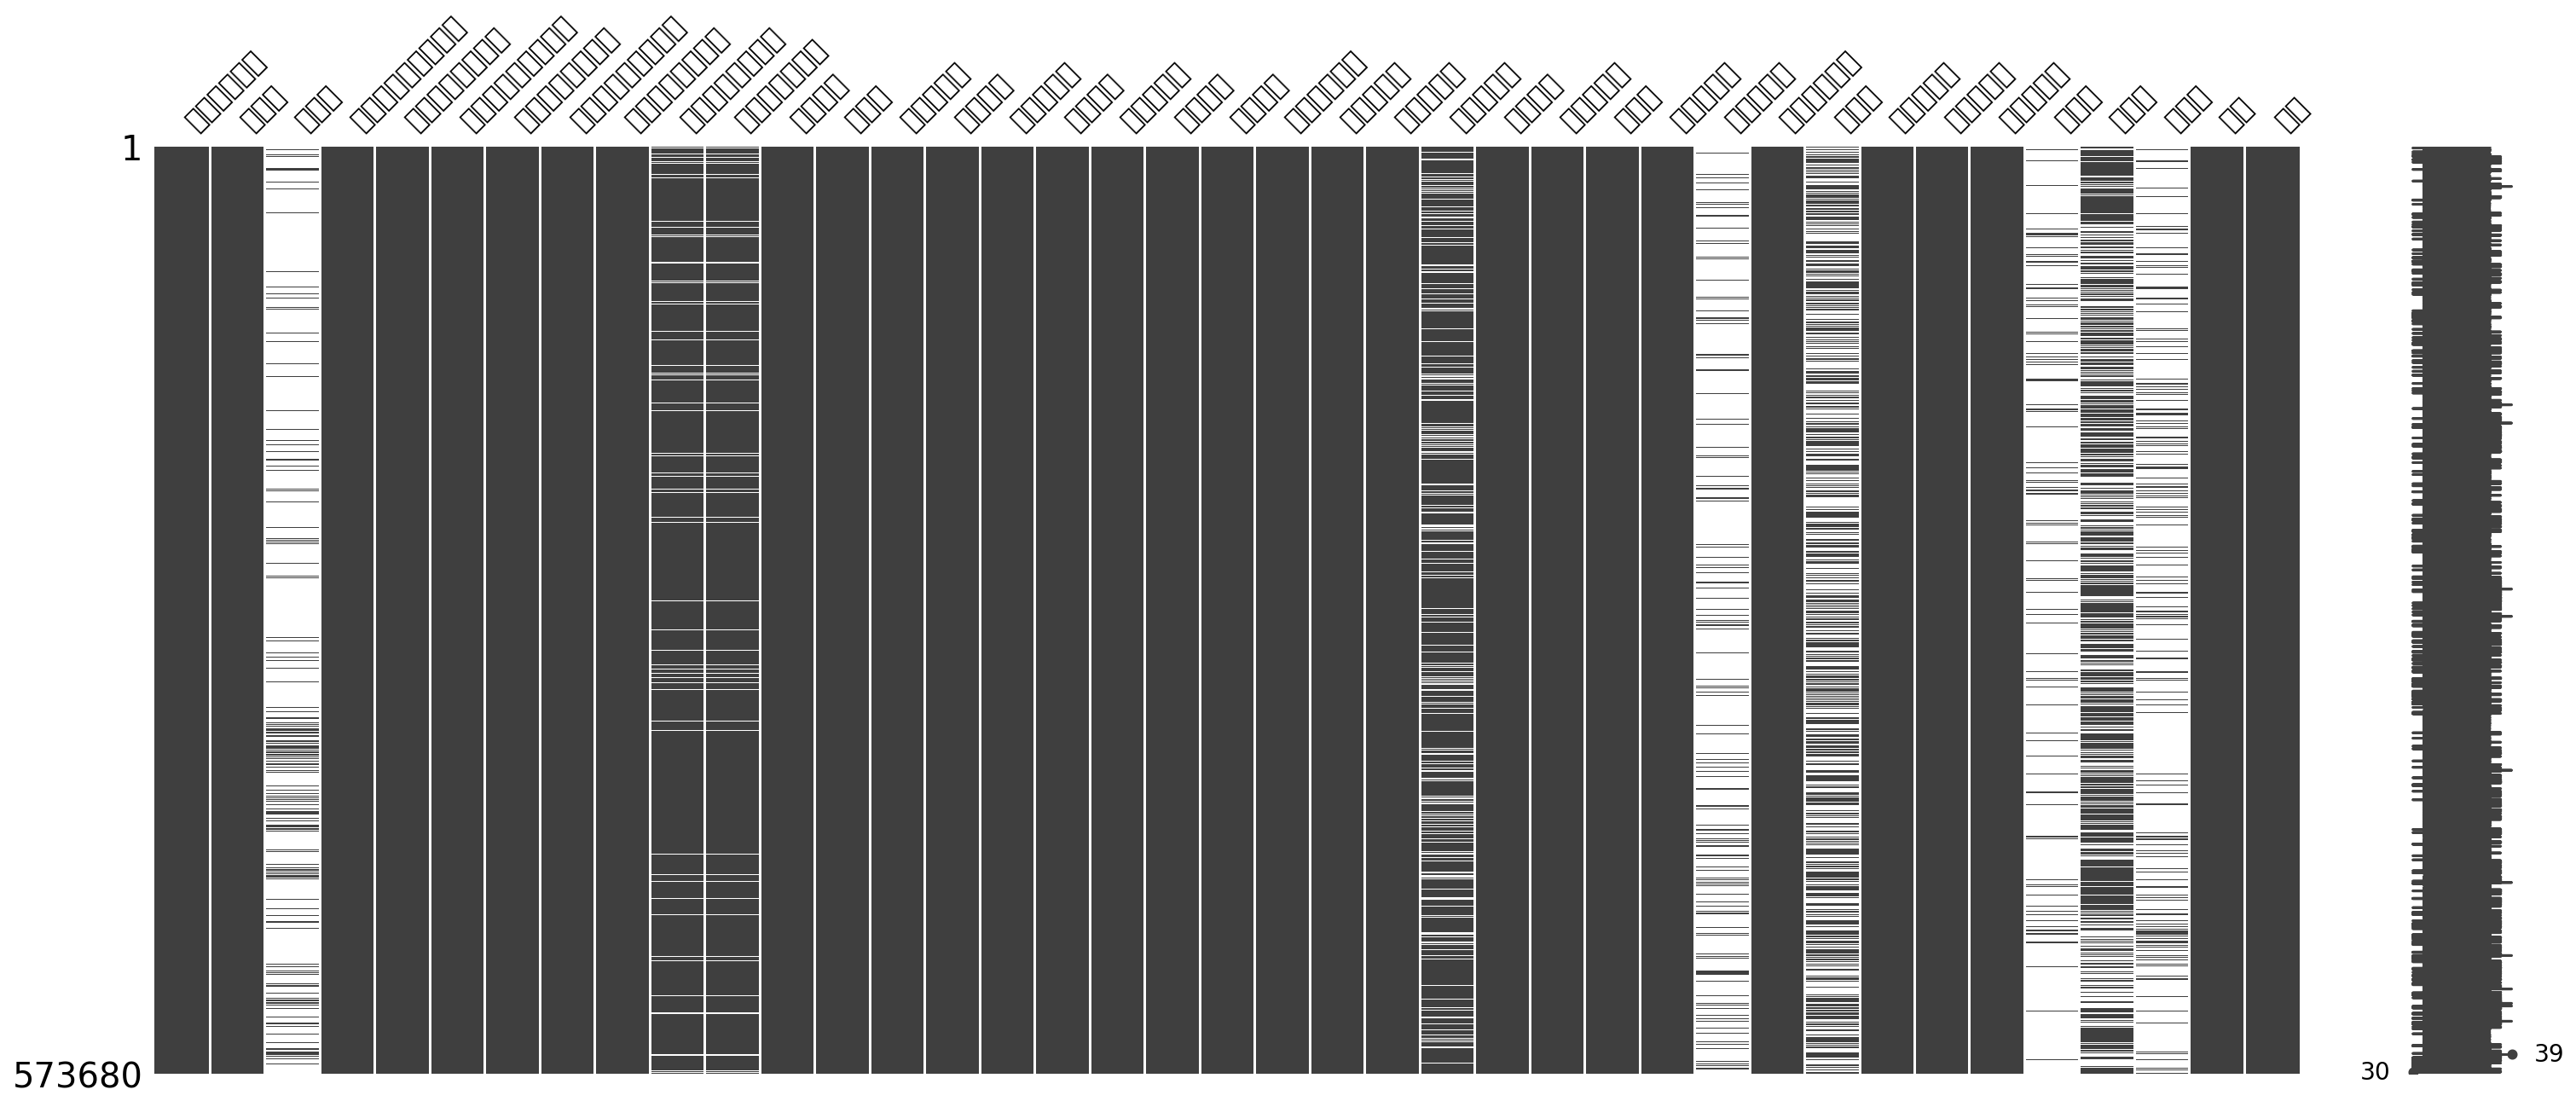

In [151]:
import missingno as msno

msno.matrix(df)

In [ ]:
# heatmap 으로 표현합니다.

msno.heatmap(df)

In [ ]:
# dendrogram 으로 표현합니다.

msno.dendrogram(df)

## 사용하지 않는 컬럼 제거하기

### 결측치가 너무 많은 컬럼 제거하기

In [137]:
# sort_values 를 통해 결측치가 많은 데이터를 위에서 9개 가져와서 not_use 변수에 담습니다.
# not_use 변수에 담긴 인덱스값만 추출해서 not_use_col 이라는 변수에 담습니다.

not_use = n.sort_values(ascending=False).head(9)
not_use_col = not_use.index
not_use_col

Index(['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [ ]:
# 사용하지 않는 컬럼을 제거하고 잘 제거가 되었는지 shape 의 수로 확인합니다.
print(df.shape)
df = df.drop(not_use_col, axis=1)
print(df.shape)

In [ ]:
# info()를 통해 해당 컬럼이 제거되었는지 확인하며 메모리 사용량이 줄어들었는지 확인합니다.

df.info()

### 사용하지 않는 컬럼 제거하기

In [ ]:
# 컬럼명을 전처리 하기 위해 cols 라는 변수에 담습니다.
cols = df.columns
cols

In [ ]:
# 컬럼명에 "코드", "번호"가 있지만 이번 분석에서는 사용하지 않기 때문에 
# 해당되는 컬럼만 찾아와서 cols_code 라는 변수에 담습니다.

cols_code = cols[cols.str.contains("코드|번호")]
cols_code

In [ ]:
# "코드", "번호" 가 들어가는 컬럼명만 drop으로 데이터프레임에서 제거합니다.
#  제거 전 후에 shape를 통해 컬럼이 삭제되었는지 확인합니다.
print(df.shape)
df = df.drop(cols_code, axis=1)
print(df.shape)

In [ ]:
# info를 통해 컬럼정보와 메모리 사용량 등을 확인합니다.

df.info()

## 행, 열을 기준으로 값을 가져오기

### 열(column)기준 
* df[열이름]
    * 결과가 Pandas 의 Series 형태로 반환
* df[[열목록]] : 2개 이상의 열을 가져올 때는 리스트 형태로 묶어서 지정해주어야 합니다.
    * 결과가 Pandas 의 DataFrame 형태로 반환
    * 1개의 열을 2차원 리스트로 지정할 때에도 DataFrame 형태로 반환이 됩니다.

In [ ]:
# "상호명" 컬럼만 가져옵니다.

df["상호명"].head()

In [ ]:
# "상호명", "도로명주소" 2개의 컬럼을 가져옵니다.

df[["상호명", "도로명주소"]].head()

### 행(row) 기준
* df.loc[행]
* df.loc[행, 열]


* df.loc[행이름 혹은 번호]
    * 결과가 Pandas 의 Series 형태로 반환
* df.loc[[행목록]] : 2개 이상의 행을 가져올 때는 열(column)을 가져올 때와 마찬가지로 리스트 형태로 묶어서 지정해주어야 합니다.
    * 결과가 Pandas 의 DataFrame 형태로 반환
    * 1개의 행을 2차원 리스트로 지정할 때에도 DataFrame 형태로 반환이 됩니다.

In [ ]:
# 0 번째 인덱스 행을 가져옵니다.

df.loc[0]

In [ ]:
# 0, 1,2 번째 인덱스 행을 가져옵니다.

df.loc[[0, 1, 2]]

In [ ]:
# 0번째 행의 "상호명"을 가져옵니다.

# df.loc[0]["상호명"]
df.loc[0, "상호명"]

In [ ]:
# 0, 1, 2 번째 행의 "상호명"을 가져옵니다.

df.loc[[0, 1, 2], "상호명"]

In [ ]:
# 0, 1, 2 번째 행의 "상호명", "도로명주소"를 가져옵니다.

df.loc[[0, 1, 2], ["상호명", "도로명주소"]]

### iloc 로 슬라이싱을 통해 가져오기

* df.iloc[:] 전체 데이터를 가져옵니다.  
* df.iloc[행, 열] 순으로 인덱스 번호를 지정합니다.
* : 은 전체를 의미합니다.
* 시작인덱스:끝나는인덱스+1을 써줍니다. 
    * 예) 3:5 라면 3번째 인덱스 부터 4번째 인덱스까지 가져옵니다.
* : 에서 앞이나 뒤 인덱스를 써주지 않으면 처음부터 혹은 끝까지를 의미합니다.
    * 예) :5 => 처음부터 4번 인덱스까지 가져옵니다.
    * 예) 5: => 5번 인덱스부터 끝까지 가져옵니다.
    * 예) -5: => 뒤에서 5번째 부터 끝까지 가져옵니다.
    * 예) :-5 => 처음부터 5번째 전까지 가져옵니다.

In [ ]:
# 위에서 5개의 행과, 왼쪽에서 5개의 열을 가져옵니다.

df.iloc[:5, :5]

In [156]:
# 끝에서 5개의 행과, 오른쪽에서 5개의 열을 가져옵니다.

df.iloc[-5:, -5:]

""


## 기술통계 값 보기

### describe 로 요약하기


* describe 를 사용하면 데이터를 요약해 볼 수 있습니다.
* 기본적으로 수치형 데이터를 요약해서 보여줍니다. 
* include, exclude 옵션으로 데이터 타입에 따른 요약수치를 볼 수 있습니다.
* 데이터의 갯수, 평균, 표준편차, 최솟값, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.
* [Descriptive statistics - Wikipedia](https://en.wikipedia.org/wiki/Descriptive_statistics)

In [ ]:
# describe 로 기술통계값을 봅니다.
# DataFrame.count: Count number of non-NA/null observations.
# DataFrame.max: Maximum of the values in the object.
# DataFrame.min: Minimum of the values in the object.
# DataFrame.mean: Mean of the values.
# DataFrame.std: Standard deviation of the observations.
# DataFrame.select_dtypes: Subset of a DataFrame including/excluding
#     columns based on their dtype.
df.describe()

In [ ]:
# 필요한 컬럼에 대한 요약만 봅니다. 
# 위도, 경도 만 따로 가져와 요약합니다.

df[["위도", "경도"]].describe()

### 개별 기술통계 값 구하기



* [Computational tools — pandas 1.0.1 documentation](https://pandas.pydata.org/docs/user_guide/computation.html#method-summary)

* count 결측치를 제외한 (NaN이 아닌) 값의 갯수를 계산
* min, max 최솟값, 최댓값
* argmin, argmax 최솟값, 최댓값이 위치한 (정수)인덱스를 반환
* idxmin, idxmax 인덱스 중 최솟값, 최댓값을 반환
* quantile 특정 사분위수에 해당하는 값을 반환 (0~1 사이)
    * 0.25 : 1사분위 수
    * 0.5 : 2사분위수 (quantile 의 기본 값)
    * 0.75 : 3사분위수
* sum 수치 데이터의 합계
* mean 평균
* median 중앙값(중간값:데이터를 한 줄로 세웠을 때 가운데 위치하는 값, 중앙값이 짝수일 때는 가운데 2개 값의 평균을 구함)
* mad 평균값으로부터의 절대 편차(absolute deviation)의 평균
* std, var 표준편차, 분산을 계산
* cumsum 맨 첫 번째 성분부터 각 성분까지의 누적합을 계산 (0 번째 부터 계속 더해짐)
* cumprod 맨 첫번째 성분부터 각 성분까지의 누적곱을 계산 (1 번째 부터 계속 곱해짐)

In [ ]:
# 결측치를 제외한 (NaN이 아닌) 값의 갯수를 계산
df["위도"].count()

In [ ]:
# 평균
df["위도"].mean()

In [ ]:
# 최댓값
df["위도"].max()

In [ ]:
# 최솟값
df["위도"].min()

In [ ]:
# 1사분위 수(25%)
df["위도"].quantile(q=0.25)

In [ ]:
# 2사분위 수(50%) == 중앙값
df["위도"].quantile()

In [ ]:
# 중앙값
df["위도"].median()

In [ ]:
# 중앙값 vs 평균값
df["위도"].mean()

In [ ]:
# 분산
df["위도"].var()

* 출처 : [표준 편차 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%91%9C%EC%A4%80_%ED%8E%B8%EC%B0%A8)

표준 편차(標準 偏差, 영어: standard deviation)는 자료의 산포도를 나타내는 수치로, 분산의 양의 제곱근으로 정의된다. 표준편차가 작을수록 평균값에서 변량들의 거리가 가깝다.[1] 통계학과 확률에서 주로 확률의 분포, 확률변수 혹은 측정된 인구나 중복집합을 나타낸다. 일반적으로 모집단의 표준편차는 {\displaystyle \sigma }\sigma (시그마)로, 표본의 표준편차는 {\displaystyle S}S(에스)로 나타낸다.[출처 필요]

편차(deviation)는 관측값에서 평균 또는 중앙값을 뺀 것이다.

분산(variance)은 관측값에서 평균을 뺀 값을 제곱하고, 그것을 모두 더한 후 전체 개수로 나눠서 구한다. 즉, 차이값의 제곱의 평균이다. 관측값에서 평균을 뺀 값인 편차를 모두 더하면 0이 나오므로 제곱해서 더한다.

표준 편차(standard deviation)는 분산을 제곱근한 것이다. 제곱해서 값이 부풀려진 분산을 제곱근해서 다시 원래 크기로 만들어준다.

In [ ]:
# 표준편차 => 분산에 root 를 씌운 값입니다.
import numpy as np

np.sqrt(df["위도"].var())

In [ ]:
df["위도"].std()

### 단변량 수치형 변수 시각화

<AxesSubplot:xlabel='위도', ylabel='Density'>

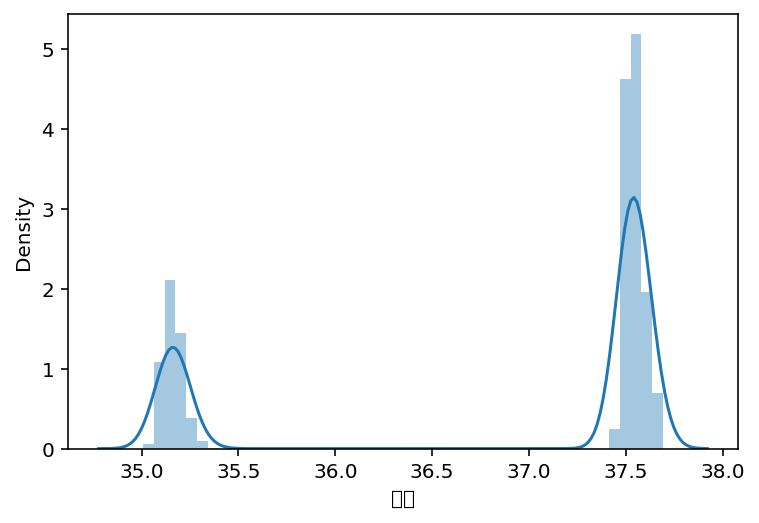

In [157]:
# 위도의 distplot 을 그립니다.

sns.distplot(df["위도"])

In [ ]:
# 경도의 distplot 을 그립니다.

sns.distplot(df["경도"])

In [ ]:
# 위도의 평균, 중앙값을 표현하고 color로 선의 색상을 linestyle 로 점선으로 표시해 봅니다.
plt.axvline(df["위도"].mean(), linestyle=":", color="r")
plt.axvline(df["위도"].median(), linestyle="--")
sns.distplot(df["위도"])

### 상관계수
* [상관 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)
* r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다.
* 결정계수(coefficient of determination) 는 r ** 2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.
    * r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
    * r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
    * r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
    * r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
    * r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
    * r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
    * r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
    
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png" width="600">

이미지 출처 : [Correlation and dependence - Wikipedia](https://en.wikipedia.org/wiki/Correlation_and_dependence)

In [ ]:
# 각 변수의 상관계수를 구합니다.

corr = df.corr()
corr

* 상관계수 시각화 : https://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [ ]:
# 위에서 구한 상관계수를 시각화 합니다.

mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot=True, cmap="Blues", mask=mask)

### 산점도로 이변량 수치형 변수 표현하기

In [ ]:
# scatterplot 으로 경도와 위도를 표현하며, 
# 데이터의 갯수가 많으면 오래 걸리기 때문에 1000 개의 샘플을 추출해서 그립니다.

sns.scatterplot(data=df.sample(1000), x="경도", y="위도")

In [ ]:
# 위 시각화에서 회귀선을 그립니다.

sns.regplot(data=df.sample(1000), x="경도", y="위도")

[Anscombe’s quartet — seaborn 0.10.0 documentation](https://seaborn.pydata.org/examples/anscombes_quartet.html)

In [ ]:
# 회귀선을 그리는 그래프의 서브플롯을 그립니다.

sns.lmplot(data=df.sample(1000), x="경도", y="위도", hue="시도명", col="시도명", fit_reg=True)

### object 타입의 데이터 요약하기

In [ ]:
# include="object" 로 문자열 데이터에 대한 요약을 봅니다.
df.describe(include="object")

In [ ]:
# 상권업종대분류명 의 요약값을 봅니다.

df["상권업종대분류명"].describe()

In [ ]:
# 상권업종대분류명 의 unique 값을 봅니다.

df["상권업종대분류명"].unique()

In [ ]:
# 상권업종대분류명 의 unique 값의 갯수를 세어봅니다.

df["상권업종대분류명"].nunique()

In [ ]:
df["상권업종대분류명"].mode()

### 범주형 변수의 빈도수 구하기

In [ ]:
# value_counts 로 상권업종대분류명 의 빈도수를 구합니다.

df["상권업종대분류명"].value_counts()

## 인덱싱과 필터로 서브셋 만들기

In [138]:
# "상권업종대분류명" 이 "음식인 데이터만 가져오기
# df_food 라는 변수에 담아줍니다. 서브셋을 새로운 변수에 저장할 때 copy()를 사용하는 것을 권장합니다.

df_food = df[df["상권업종대분류명"] == "음식"].copy()
df_food.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1168010100206960042,1,대지,696,42.0,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,NaN,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11545,금천구,1154563000,독산3동,1154510200,독산동,1154510200201620001,1,대지,162,1.0,서울특별시 금천구 독산동 162-1,115453117003,서울특별시 금천구 가산로,34,6.0,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,"피자, 햄버거, 샌드위치 및 유사 음식점업",26,부산광역시,26530,사상구,2653062000,괘법동,2653010400,괘법동,2653010400205780000,1,대지,578,NaN,부산광역시 사상구 괘법동 578,265303139004,부산광역시 사상구 괘감로,37,NaN,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
5,19983535,초밥왕,NaN,Q,음식,Q03,일식/수산물,Q03A03,음식점-초밥전문,I56113,일식 음식점업,11,서울특별시,11710,송파구,1171071000,잠실6동,1171010200,신천동,1171010200200070028,1,대지,7,28.0,서울특별시 송파구 신천동 7-28,117103123023,서울특별시 송파구 올림픽로,293,19.0,1171010200100070028000237,현대타워아파트,서울특별시 송파구 올림픽로 293-19,138735,5510.0,NaN,1,NaN,127.102490,37.515149


### 강남구의 상권업종대분류가 음식만 보기

In [ ]:
# 시군구명이 "강남구" 인 데이터만 가져옵니다.

df[df["시군구명"] == "강남구"].head()

In [139]:
# 이번에는 시군구명이 "강남구" 이고 "상권업종대분류명" 이 "음식"인 서브셋을 가져온 후 
# "상권업종중분류명" 별로 빈도수를 구합니다.

df[(df["시군구명"] == "강남구") & 
   (df["상권업종대분류명"] == "음식")]["상권업종중분류명"].value_counts()

한식         4371
커피점/카페     2790
유흥주점       1573
양식         1573
일식/수산물     1255
분식         1197
패스트푸드       786
제과제빵떡케익     650
닭/오리요리      539
중식          358
별식/퓨전요리     341
부페           63
기타음식업        47
음식배달서비스      11
Name: 상권업종중분류명, dtype: int64

In [140]:
# 위와 똑같이 구하지만 이번에는 loc를 사용합니다.
# loc[행, 열]
df.loc[(df["시군구명"] == "강남구") & (df["상권업종대분류명"] == "음식"),
       "상권업종중분류명"].value_counts()

한식         4371
커피점/카페     2790
유흥주점       1573
양식         1573
일식/수산물     1255
분식         1197
패스트푸드       786
제과제빵떡케익     650
닭/오리요리      539
중식          358
별식/퓨전요리     341
부페           63
기타음식업        47
음식배달서비스      11
Name: 상권업종중분류명, dtype: int64

### 구별 음식점 업종 비교하기

In [ ]:
# df_seoul_food 에 "시도명"이 "서울특별시" 이고 "상권업종대분류명" 이 "음식" 에 대한 서브셋만 가져와서 담아줍니다.

df_seoul_food = df[(df["시도명"] == "서울특별시") & (df["상권업종대분류명"] == "음식")].copy()
df_seoul_food.shape

In [147]:
# "시군구명", "상권업종중분류명" 으로 그룹화 해서 상점수를 세어봅니다.
# 결과를 food_gu 에 담아 재사용할 예정입니다.

food_gu = df_seoul_food.groupby(["시군구명", "상권업종중분류명"])["상호명"].count()
food_gu.head(5)

시군구명  상권업종중분류명
강남구   기타음식업         47
      닭/오리요리       539
      별식/퓨전요리      341
      부페            63
      분식          1197
Name: 상호명, dtype: int64

In [145]:
food_gu.unstack().iloc[:5, :5]

In [ ]:
# food_gu 에 담긴 데이터를 시각화 합니다.
# 상권업종중분류명 과 상점수 로 barplot을 그립니다.

food_gu.unstack().loc["강남구"].plot.bar()

In [149]:
food = food_gu.reset_index()
food
food = food.rename(columns={"상호명":"상호수"})
food.head()
print(food["상호수"].dtype)

int64


In [ ]:
plt.figure(figsize=(15, 4))
sns.barplot(data=food, x="상권업종중분류명", y="상호수")

* https://seaborn.pydata.org/tutorial/categorical.html

In [ ]:
# catplot을 사용하여 서브프롯을 그립니다.

sns.catplot(data=food, x="시군구명", y="상호수", 
            kind="bar", col="상권업종중분류명", col_wrap=4)

## 구별 학원수 비교
* 주거나 입지로 문화시설이나 학원, 교육 등을 고려하게 됩니다.
* 사교육이 발달한 지역으로 대치동이나 목동을 꼽는데 이 지역에 학원이 많이 분포 되어 있는지 알아봅니다.

### 서브셋 만들고 집계하기

In [141]:
# 학원의 분류명을 알아보기 위해 "상권업종대분류명"의 unique 값을 추출합니다.

df["상권업종대분류명"].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

In [142]:
# "시도명"이 "서울특별시"이고 "상권업종대분류명"이 "학문/교육" 인 데이터를 서브셋으로 가져옵니다.
# 재사용을 위해 서브셋을 df_academy 에 저장합니다.

df_academy = df[(df["시도명"] == "서울특별시") & (df["상권업종대분류명"] == "학문/교육")].copy()
df_academy.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
85,20776515,GIA보석교육원,NaN,R,학문/교육,R03,학원-자격/국가고시,R03A11,학원-보석감정,P85659,기타 기술 및 직업훈련학원,11,서울특별시,11680,강남구,1168054500,압구정동,1168010700,신사동,1168010700206390003,1,대지,639,3.0,서울특별시 강남구 신사동 639-3,116803122007,서울특별시 강남구 압구정로,320,NaN,1168010700106390003009673,극동GALLERY,서울특별시 강남구 압구정로 320,135896,6017.0,NaN,5,NaN,127.036437,37.528532
101,20736806,안재형영어,NaN,R,학문/교육,R04,학원-어학,R04A01,학원-외국어/어학,P85502,외국어학원,11,서울특별시,11470,양천구,1147055000,목5동,1147010200,목동,1147010200209050034,1,대지,905,34.0,서울특별시 양천구 목동 905-34,114703114003,서울특별시 양천구 목동서로,133,2.0,1147010200109050034000001,목동하나프라자,서울특별시 양천구 목동서로 133-2,158050,7988.0,NaN,7,NaN,126.875973,37.531592
121,20769711,정아트,NaN,R,학문/교육,R05,학원-음악미술무용,R05A01,서예/서화/미술,P85620,예술 학원,11,서울특별시,11500,강서구,1150051000,염창동,1150010100,염창동,1150010100201840008,1,대지,184,8.0,서울특별시 강서구 염창동 184-8,115004145427,서울특별시 강서구 양천로73가길,21,NaN,1150010100101840008028367,한양피아노학원,서울특별시 강서구 양천로73가길 21,157861,7541.0,NaN,2,NaN,126.873645,37.550924
126,20887860,경찰태권도,NaN,R,학문/교육,R07,학원-예능취미체육,R07A20,태권도장,P85611,스포츠 교육기관,11,서울특별시,11290,성북구,1129066000,길음1동,1129013400,길음동,1129013400212830004,1,대지,1283,4.0,서울특별시 성북구 길음동 1283-4,112903107001,서울특별시 성북구 길음로,20,NaN,1129013400112830004000001,"길음뉴타운,래미안길음3차아파트상가",서울특별시 성북구 길음로 20,136110,2725.0,NaN,5,NaN,127.023020,37.604749
134,20924451,아트인스튜디오,NaN,R,학문/교육,R05,학원-음악미술무용,R05A01,서예/서화/미술,P85620,예술 학원,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1168010100208180001,1,대지,818,1.0,서울특별시 강남구 역삼동 818-1,116804166038,서울특별시 강남구 강남대로96길,12,NaN,1168010100108180001023766,NaN,서울특별시 강남구 강남대로96길 12,135080,6129.0,NaN,NaN,3,127.028054,37.499729


In [143]:
# df_academy 에서 "상호명"으로 빈도수를 구합니다.
df_academy["상호명"].value_counts().head(10)

점프셈교실      1659
해법수학         57
윤선생영어교실      34
뮤엠영어         27
해법영어교실       24
눈높이          22
해동검도         22
삼성영어         21
구몬학습         20
경희대태권도       19
Name: 상호명, dtype: int64

In [ ]:
# "시군구명" 으로 빈도수를 구합니다.
df_academy["시군구명"].value_counts()

In [159]:
# "상권업종소분류명"으로 빈도수를 구하고 위에서 30개만 봅니다.
academy_count = df_academy["상권업종소분류명"].value_counts().head(30)
academy_count

학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
학원-기타           677
태권도장            610
학습지보급           430
학원-어린이영어        319
컴퓨터학원           270
학원-스포츠/재즈댄스     269
학원-무용           220
놀이방             139
학원-주산암산부기속셈     122
유아교육기관기타        107
학원-미용           106
학원-배우/탤런트       102
합기도장             96
검도도장             95
실내놀이터-유아         84
학원-요리            78
학원-간호조무사         76
학원/국가고시          70
학원-사교춤           54
유도장              49
학원-심리변론          46
학원-국악            45
Name: 상권업종소분류명, dtype: int64

In [160]:
# "상권업종소분류명"으로 빈도수를 구하고
# 빈도수가 1000개 이상인 데이터만 따로 봅니다.

academy_count_1000 = academy_count[academy_count > 1000]
academy_count_1000

학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
Name: 상권업종소분류명, dtype: int64

In [ ]:
# "시군구명", "상권업종소분류명" 으로 그룹화를 하고 "상호명"으로 빈도수를 계산합니다.

g_academy = df_academy.groupby(["시군구명", "상권업종소분류명"])["상호명"].count()
g_academy = g_academy.reset_index()
g_academy.columns = ["시군구명", "상권업종소분류명", "상호수"]
g_academy.head()

### seaborn으로 시각화 하기

In [ ]:
# 위에서 구한 결과를 시군구명, 상호수로 barplot을 그립니다.

plt.figure(figsize=(15, 4))
sns.barplot(data=g_academy, x="시군구명", y="상호수")

###  isin 을 사용해 서브셋 만들기
* 상권업종소분류명을 빈도수로 계산했을 때 1000개 이상인 데이터만 가져와서 봅니다.

In [158]:
academy_count_1000.index

Index(['학원-입시', '학원(종합)', '어린이집', '학원-외국어/어학', '피아노/바이올린/기타', '서예/서화/미술',
       '독서실', '고시원'],
      dtype='object')

In [ ]:
# isin 으로 빈도수로 계산했을 때 1000개 이상인 데이터만 가져와서 봅니다.
# 서브셋을 df_academy_selected 에 저장합니다.

print(df_academy.shape)
df_academy_selected = df_academy[
    df_academy["상권업종소분류명"].isin(academy_count_1000.index)].copy()
df_academy_selected.shape

In [ ]:
df_academy_selected["상권업종소분류명"].value_counts()

In [ ]:
# df_academy_selected 의 "시군구명"으로 빈도수를 셉니다.

df_academy_selected["시군구명"].value_counts()

In [ ]:
df_academy_selected.loc[
    df_academy_selected["법정동명"] == "대치동", 
    "상권업종소분류명"].value_counts()

In [ ]:
df_academy_selected.loc[
    df_academy_selected["법정동명"] == "목동", 
    "상권업종소분류명"].value_counts()

In [ ]:
# df_academy_selected 로 위에서 했던 그룹화를 복습해 봅니다.
# "상권업종소분류명", "시군구명" 으로 그룹화를 하고 "상호명"으로 빈도수를 계산합니다.
# g 라는 변수에 담아 재사용 할 예정입니다.
g = df_academy_selected.groupby(["상권업종소분류명", "시군구명"])["상호명"].count()
g

### Pandas 의 plot 으로 시각화

In [ ]:
# 상권업종소분류명이 index 로 되어 있습니다.
# loc를 통해 index 값을 가져올 수 있습니다.
# 그룹화된 결과 중 "학원-입시" 데이터만 가져옵니다. 
g.loc["학원-입시"].sort_values().plot.barh(figsize=(10, 7))

In [ ]:
# 그룹화된 데이터를 시각화 하게 되면 멀티인덱스 값으로 표현이 되어 보기가 어렵습니다.
# 다음 셀부터 이 그래프를 개선해 봐요!

g.plot.bar()

### unstack() 이해하기
* https://pandas.pydata.org/docs/user_guide/reshaping.html
<img src="https://pandas.pydata.org/docs/_images/reshaping_stack.png">
<img src="https://pandas.pydata.org/docs/_images/reshaping_unstack.png">

In [ ]:
# 위에서 그룹화한 데이터를 unstack() 하고 iloc로 위에서 5개 왼쪽에서 5개만 서브셋을 봅니다.

g.unstack().iloc[:5, :5]

In [ ]:
# 그룹화된 결과에 unstack 을 사용하면 마지막 인덱스 컬럼이 컬럼으로 바뀝니다.

g.unstack().plot.barh(figsize=(8, 9))

In [ ]:
# 구별로 학원 수 시각화 하기 unstack() 값에 transpose 를 하면 행과 열이 바뀝니다.

g.unstack().T.plot.bar(figsize=(15, 5))

In [ ]:
# 그룹화 한 값의 인덱스를 출력해 봅니다.

g.index

In [ ]:
# 멀티인덱스보다 컬럼으로 접근이 편하기 때문에 reset_index 를 통해 인덱스값을 컬럼으로 만들어 줍니다.
# "상호명" 컬럼은 "상호수" 이기 때문에 컬럼명을 변경해 줍니다.

t = g.reset_index()
t = t.rename(columns={"상호명":"상호수"})
t

### 같은 그래프를 seaborn 으로 그리기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png">

이미지 출처 : https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

In [ ]:
# x축에 시군구명을 y축에 상호수를 막대그래프로 그립니다. 
# 상권업종소분류명 으로 색상을 다르게 표현합니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=t, x="시군구명", y="상호수", ci=None)

In [ ]:
# x축에 상권업종소분류명을 y축에 상호수를 막대그래프로 그립니다. 
# 시군구명 으로 색상을 다르게 표현합니다.


plt.figure(figsize=(15, 4))
sns.barplot(data=t, x="상권업종소분류명", y="상호수", ci=None)

In [ ]:
# "상권업종소분류명"이 "학원-입시" 인 서브셋만 가져와서 시각화 합니다.

academy_sub = t[t["상권업종소분류명"] == "학원-입시"].copy()
print(academy_sub.shape)
plt.figure(figsize=(15, 4))
sns.barplot(data=academy_sub, x="시군구명", y="상호수")

In [ ]:
# catplot을 통해 서브플롯을 그립니다.
sns.catplot(data=t, x="상권업종소분류명", y="상호수", kind="bar", 
            col="시군구명", col_wrap=4, sharex=False)

### 경도와 위도를 scatterplot 으로 표현하기

In [ ]:
# scatterplot 으로 경도와 위도를 표현하고 시군구명으로 색상을 다르게 표현합니다.
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_academy_selected, x="경도", y="위도", hue="시군구명")

In [ ]:
# scatterplot 으로 경도와 위도를 표현하고 상권업종소분류명으로 색상을 다르게 표현합니다.

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_academy_selected, x="경도", y="위도", hue="상권업종소분류명")

In [ ]:
# "상권업종소분류명"이 "학원-입시" 인 데이터만 그려봅니다.


plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_academy_selected[df_academy_selected["상권업종소분류명"] == "학원-입시"], 
                x="경도", y="위도", hue="상권업종소분류명")

In [ ]:
# "상권업종소분류명"이 "어린이집" 인 데이터만 그려봅니다.


plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_academy_selected[df_academy_selected["상권업종소분류명"] == "어린이집"], 
                x="경도", y="위도", hue="상권업종소분류명")

In [ ]:
# 어린이집과 학원-입시를 비교해 봅니다.


plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_academy_selected[
        df_academy_selected["상권업종소분류명"].isin(["어린이집", "학원-입시"])],
    x="경도", y="위도", hue="상권업종소분류명")


## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://i.imgur.com/x7pzfCP.jpg">
* <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.


* 윈도우
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


검은색 프롬프트 창에 아래 명령어를 통해 folium 을 설치합니다.


`conda install -c conda-forge folium`


### Folium 사용예제
* 예제목록 : http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/
* Quickstart : https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb

In [ ]:
# 위에서 그렸던 어린이집과 학원-입시에 대한 상호 데이터를 지도에 시각화 해봅니다.

import folium 

In [ ]:
long = df_academy_selected["경도"].mean()
lat = df_academy_selected["위도"].mean()

In [ ]:
df_m = df_academy_selected[
        df_academy_selected["상권업종소분류명"].isin(["어린이집", "학원-입시"])]
df_m = df_m.sample(1000)
df_m.shape

In [ ]:
df_m.iloc[0]

In [ ]:
m = folium.Map(location=[lat, long], zoom_start=12)


folium.Marker([37.5545, 126.867], tooltip="해법수학").add_to(m)

m

In [ ]:
m.save('index.html')

In [ ]:
df_m.index

In [ ]:
for i in df_m.index[:10]:
    tooltip = df_m.loc[i, "상호명"] +"-"+ df_m.loc[i, "도로명주소"]
    lat = df_m.loc[i, "위도"]
    long = df_m.loc[i, "경도"]
    
    print(tooltip, lat, long)

In [ ]:
m = folium.Map(location=[lat, long], zoom_start=12, 
    tiles='Stamen Toner')

for i in df_m.index[:100]:
    tooltip = df_m.loc[i, "상호명"] +"-"+ df_m.loc[i, "도로명주소"]
    lat = df_m.loc[i, "위도"]
    long = df_m.loc[i, "경도"]
    
    folium.CircleMarker([lat, long], tooltip=tooltip, radius=3).add_to(m)

m